## 🎯 Contexte client

Notre client fictif, *SuperStore Inc.*, est une PME américaine spécialisée dans la vente de mobilier, fournitures et produits technologiques à travers les États-Unis.  
Elle souhaite comprendre quelles sont les **zones, produits et catégories les plus rentables**, et **où concentrer ses efforts commerciaux**.

**Objectif de la mission :**  
Identifier des leviers d’optimisation à partir de l’analyse des ventes et des profits.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Sample - Superstore 2.csv', encoding='ISO-8859-1')

# Fichier pas encodé en UTF-8 par défaut, encoding nécessaire

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [ ]:
df.drop("Row ID", axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df_clean = df.copy()

## Nettoyage des données

- Conversion des dates : `Order Date` et `Ship Date` au format datetime.
- Suppression de la colonne inutile `Row ID`.
- Vérification des doublons : 1 doublon supprimé.
- Vérification des valeurs numériques :
  - `Profit` peut être négatif, ce qui est logique dans un contexte commercial (ventes à perte, remises).
  - Aucune incohérence visible sur `Sales`, `Quantity`, `Discount`.

**Valeurs globalement cohérentes au premier coup d'oeil**

---

✅ Le jeu de données est désormais propre et prêt pour l'EDA (Exploratory Data Analysis)

<Axes: ylabel='Country'>

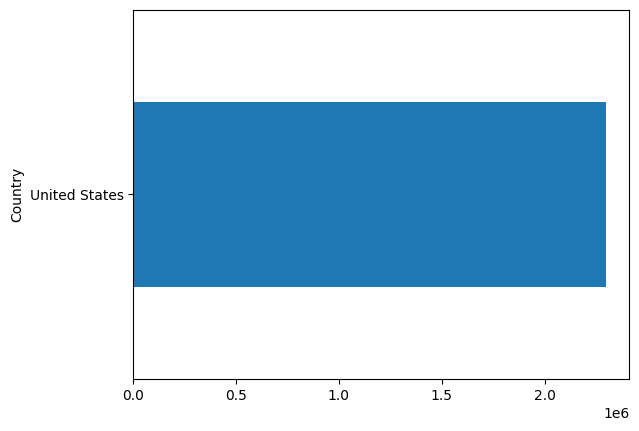

In [ ]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20).plot.barh()

## Toutes les données sont aux États-Unis.

## Analysons les performances géographiques de la marque.

Text(0.5, 1.0, "Top 20 des États par ventes en Chiffre d'Affaires")

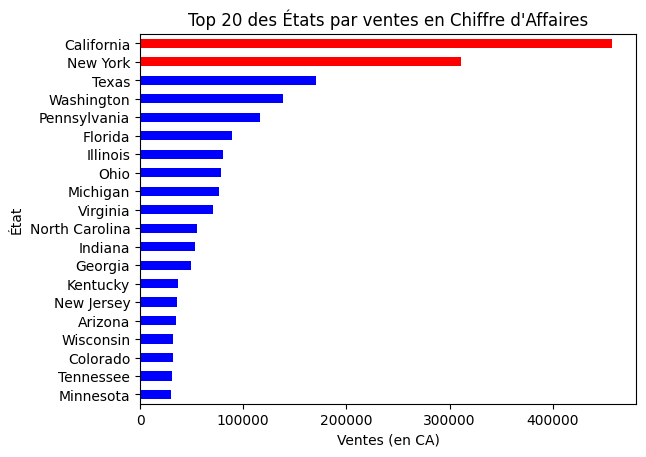

In [ ]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
ax = df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors)
ax.set_ylabel("État")
ax.set_xlabel("Ventes (en CA)")
ax.set_title("Top 20 des États par ventes en Chiffre d'Affaires")

Text(0.5, 1.0, 'Top 20 des États par profit')

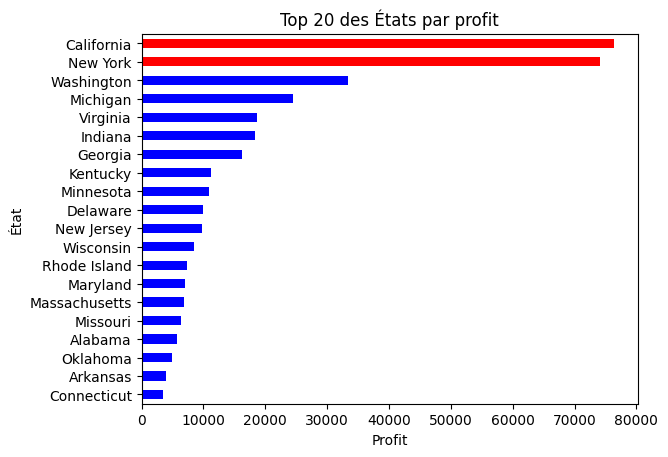

In [ ]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
ax = df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors)
ax.set_ylabel("État")
ax.set_xlabel("Profit")
ax.set_title("Top 20 des États par profit")

### Deux États sortent du lot en ce qui concerne la génération du CA et le profit pour la marque : New York, et la Californie, et le premier est le plus profitable des deux.


### **Peut-on appliquer le principe de Pareto aux États et aux ventes ?**

In [ ]:
df1=pd.DataFrame(df.groupby('State')['Sales'].sum().sort_values(ascending=False))

In [ ]:
df1.quantile(0.8, interpolation='higher')

,0.8
Sales,70636.72


In [ ]:
df1[df1['Sales']>=70636.72].sum()/df['Sales'].sum()

,0
Sales,0.691585


## Les 20% États les plus performants génèrent presque 70% du chiffre d'affaires.

### **Quid du profit ?**

In [ ]:
df2 = df.groupby('State')['Profit'].sum().sort_values(ascending=False).reset_index()
df2.columns = ['State', 'Profit']

In [ ]:
df2_sorted = df2.sort_values(by='Profit', ascending=False)
top_n = int(len(df2_sorted) * 0.2)
top_states = df2_sorted.head(top_n)
top_states['Profit'].sum() / df2['Profit'].sum()

np.float64(0.9900228267632154)

## **Les 20% États les plus profitables réalisent 99% du profit !**

Cette concentration extrême indique qu’une grande partie des États sont faiblement, voire pas du tout rentables.

📌 Cela indique qu'il est crucial de se focaliser sur les États à forte marge pour optimiser les efforts commerciaux et revoir la stratégie dans les zones peu rentables.

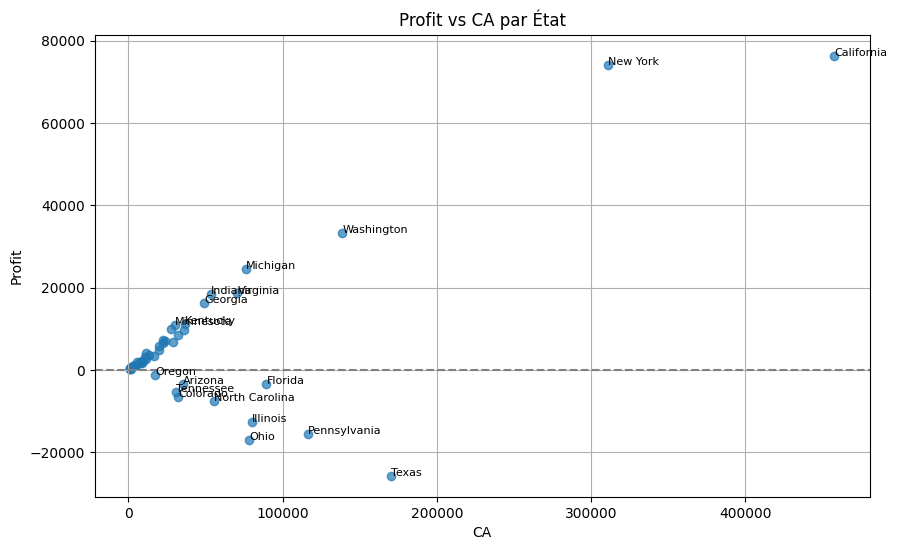

In [ ]:
df_state = df.groupby('State')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(df_state['Sales'], df_state['Profit'], alpha=0.7)

for i, row in df_state.iterrows():
    if row['Sales'] > 100000 or row['Profit'] > 10000 or row['Profit'] < 0:
        plt.text(row['Sales'], row['Profit'], row['State'], fontsize=8)

plt.axhline(0, color='grey', linestyle='--')  # ligne pour repérer les pertes
plt.title("Profit vs CA par État")
plt.xlabel("CA")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

## Observons maintenant quelle catégorie de produit génère le plus de chiffres.

Text(0, 0.5, 'Catégorie')

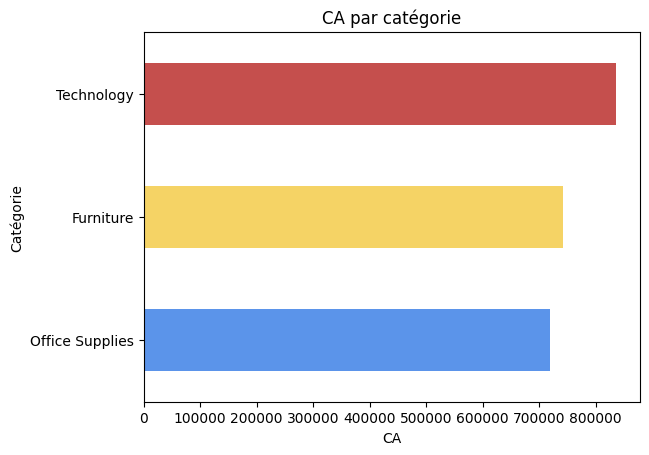

In [ ]:
colors = ['#5B94EA', '#F5D365', '#c54f4d']

ax = df.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot.barh(color=colors)
ax.set_title('CA par catégorie')
ax.set_xlabel('CA')
ax.set_ylabel('Catégorie')

Text(0, 0.5, 'Catégorie')

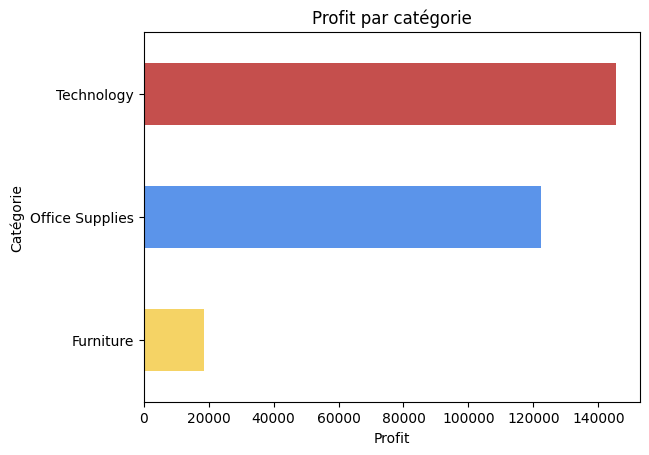

In [ ]:
colors = ['#F5D365', '#5B94EA', '#c54f4d']

ax = df.groupby('Category')['Profit'].sum().sort_values(ascending=True).plot.barh(color=colors)
ax.set_title('Profit par catégorie')
ax.set_xlabel('Profit')
ax.set_ylabel('Catégorie')

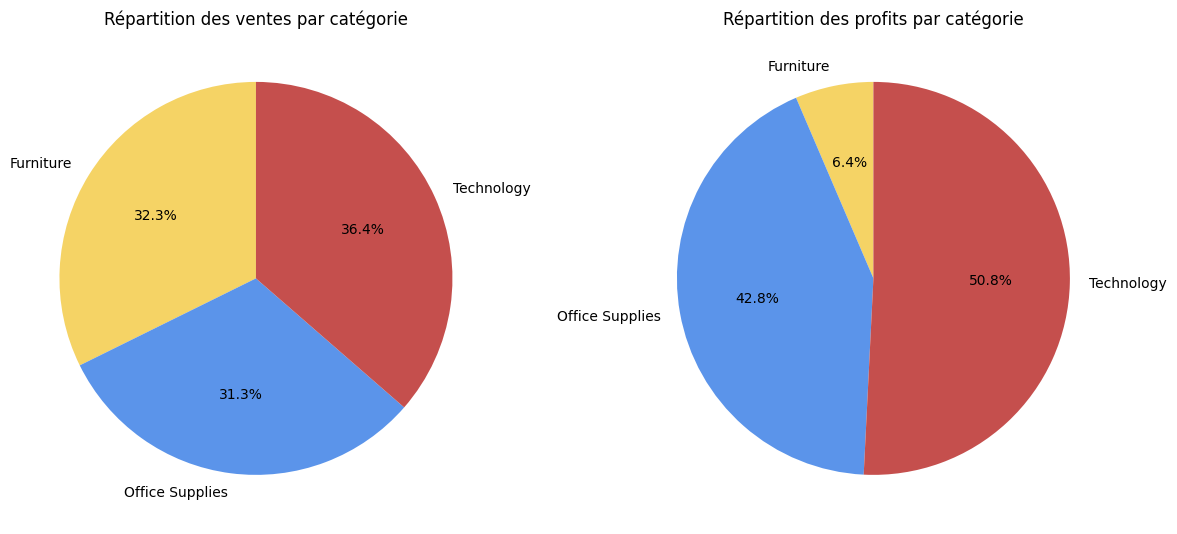

In [ ]:
# Agrégation des données
df_cat = df.groupby('Category')[['Sales', 'Profit']].sum()

colors = ['#F5D365', '#5B94EA', '#c54f4d']

# Création des deux pie charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Pie chart des ventes
axes[0].pie(df_cat['Sales'], labels=df_cat.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title("Répartition des ventes par catégorie")

# Pie chart des profits
axes[1].pie(df_cat['Profit'], labels=df_cat.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title("Répartition des profits par catégorie")

plt.tight_layout()
plt.show()

### Analyse par segment client

L’analyse des segments montre que :

- Le segment **Consumer** (particuliers) est le plus stratégique, générant **plus de 45 % du chiffre d’affaires total**, et **la plus grosse part de profit**.
- Le segment **Corporate** (entreprises), bien qu’important en volume, **génère un profit relativement plus faible proportionnellement** ➜ à surveiller en termes de marge.
- Le segment **Home Office** (freelancers/autoentreprises) est marginal en termes de contribution aux ventes et à la rentabilité.

**Recommandations :**
Concentrer les campagnes marketing et les efforts commerciaux sur les clients Consumer, tout en **réévaluant la politique commerciale appliquée au segment Corporate** (remises, coûts, produits proposés…).

In [ ]:
df_segment = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

<Axes: title={'center': 'Ventes et profits par segment client'}, xlabel='Segment'>

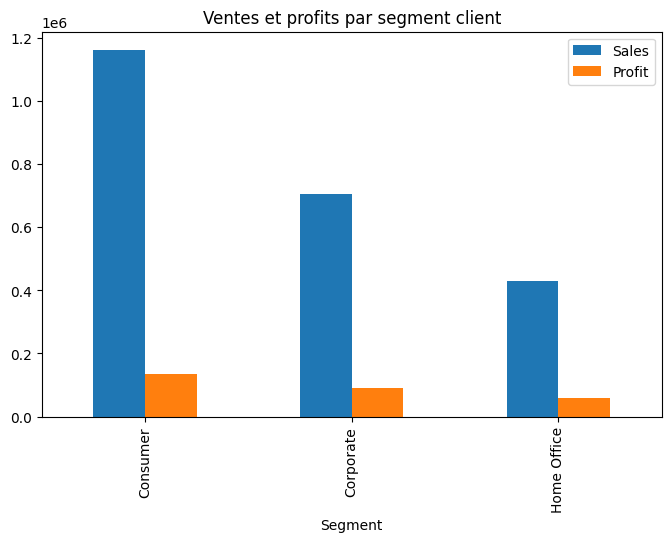

In [ ]:
df_segment.plot(kind='bar', figsize=(8,5), title="Ventes et profits par segment client")

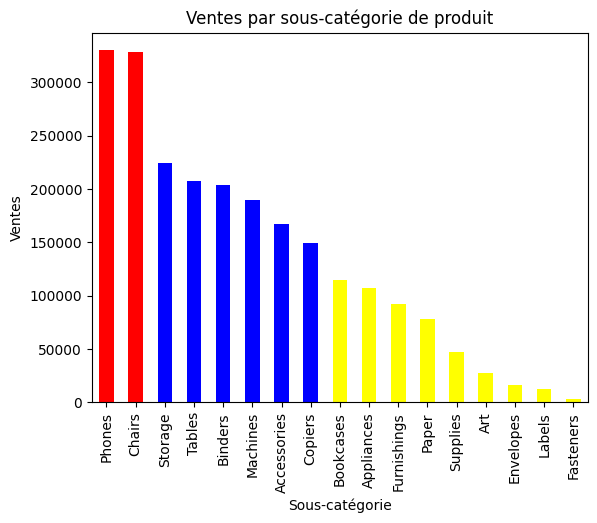

In [ ]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
ax = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors);
ax.set_title('Ventes par sous-catégorie de produit');
ax.set_xlabel('Sous-catégorie');
ax.set_ylabel('Ventes');

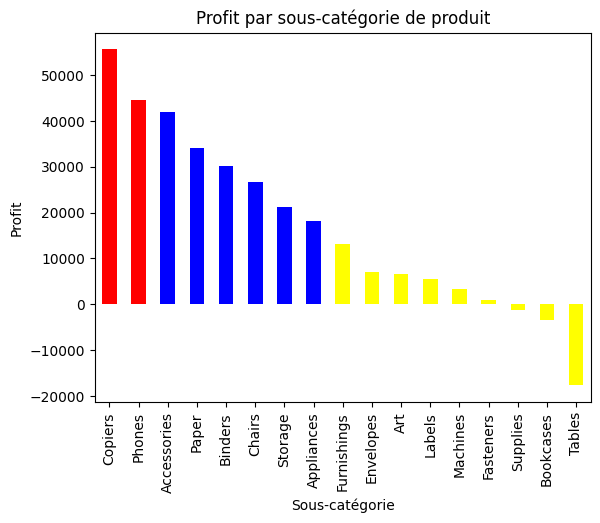

In [ ]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
ax = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);
ax.set_title('Profit par sous-catégorie de produit');
ax.set_xlabel('Sous-catégorie');
ax.set_ylabel('Profit');

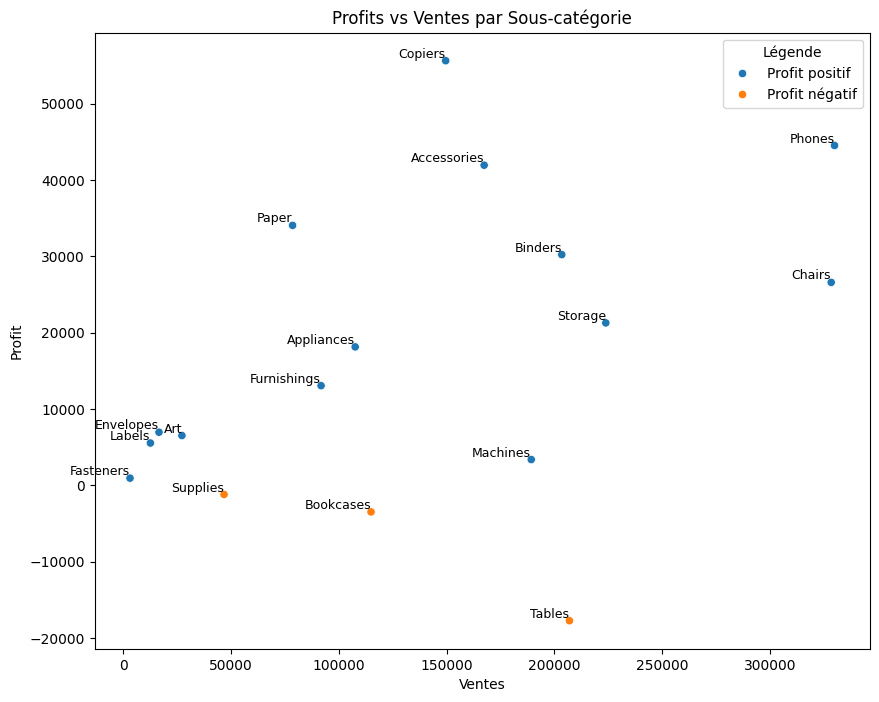

In [ ]:
df_subcategory = pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())
df_subcategory['Profit'] = df.groupby('Sub-Category')['Profit'].sum()

# Ajout de la légende
def type(ex):
    return 'Profit négatif' if ex < 0 else 'Profit positif'

df_subcategory['Légende'] = df_subcategory['Profit'].apply(type)
df_subcategory = df_subcategory.reset_index()  # Nécessaire pour accéder à 'Sub-Category' dans la boucle

# Tracé
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=df_subcategory, hue='Légende', x='Sales', y='Profit')

# ➕ Ajout des noms des sous-catégories
for i in range(df_subcategory.shape[0]):
    plt.text(
        x=df_subcategory['Sales'][i],
        y=df_subcategory['Profit'][i],
        s=df_subcategory['Sub-Category'][i],
        fontsize=9,
        ha='right',
        va='bottom'
    )

plt.xlabel("Ventes")
plt.title("Profits vs Ventes par Sous-catégorie")
plt.show()

### Produits à marge négative à surveiller ! (Supplies, bookcases, tables)

## Quid de l'évolution mensuelle des ventes ?

<Axes: title={'center': 'Évolution mensuelle des ventes et des profits'}, xlabel='Temps', ylabel='$'>

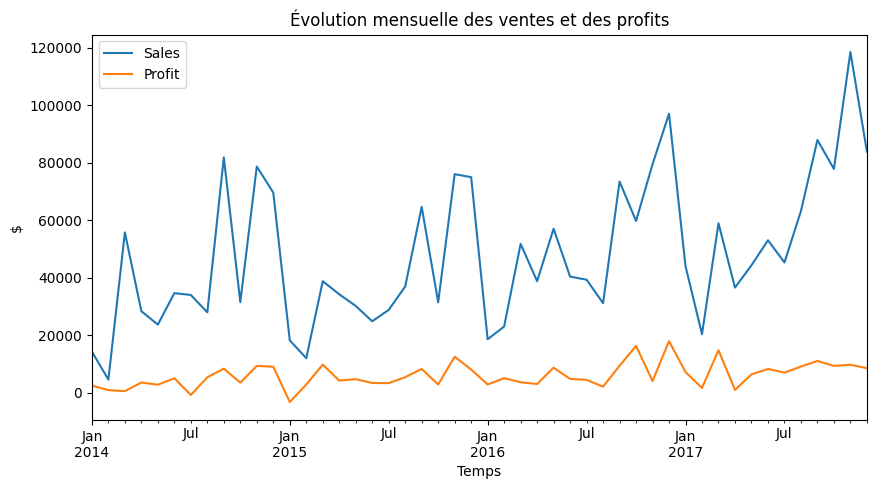

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df_time = df.groupby('YearMonth')[['Sales', 'Profit']].sum()

df_time.plot(figsize=(10,5), title="Évolution mensuelle des ventes et des profits", xlabel="Temps", ylabel="$" )

### On note des pics de ventes durant les mêmes périodes au fil des années : **à la rentrée et à la fin de l'année.**

# ✅ Recommandations stratégiques

-  Concentrer les efforts sur la catégorie **Technology**, très rentable et à fort volume.
- Surveiller la catégorie **Furniture**, peu rentable malgré son poids dans les ventes.
-  Optimiser les États comme **le Texas ou la Pennsylvanie**, à fort CA (respectivement top 3 et 5) mais marge faible (hors du top 20 en profit).
-  Analyser plus en détail les **pics de ventes** (généralement en **septembre**, et en **novembre-décembre**) pour ajuster les stocks et/ou les campagnes marketing.
- Réévaluer les prix / remises des produits à profit négatif, notamment les **tables** qui font partie des produits les mieux vendus mais qui représente la sous-catégorie de produits les moins rentables de loin.

Une stratégie de ciblage plus fine pourrait améliorer sensiblement la marge globale.